In [31]:
import psycopg2
import matplotlib.pyplot as plt
import pandas as pd

# Connect to your postgres DB
conn = psycopg2.connect(
    host="postgres",      # or IP address
    port=5432,             # default postgres port
    database="piscineds",
    user="pnamnil",
    password="mysecretpassword"
)

# Open a cursor to perform database operations
# cur = conn.cursor()

# Example: execute a query
# cur.execute("SELECT version();")

# Fetch result
# db_version = cur.fetchone()
# print(f"Database version: {db_version}")

cur = conn.cursor()
sql = "SELECT event_type, count(*) FROM customers GROUP BY event_type;"
cur.execute(sql)

result = cur.fetchall()
print(result)
# Always close cursor and connection when done
cur.close()
conn.close()


[('view', 9657821), ('cart', 5768333), ('remove_from_cart', 3979679), ('purchase', 1287007)]


In [32]:
df = pd.DataFrame(result, columns=['event', 'amount']).set_index('event')
df

,amount
event,
view,9657821
cart,5768333
remove_from_cart,3979679
purchase,1287007


In [33]:
df.describe()

,amount
count,4.000000e+00
mean,5.173210e+06
std,3.511552e+06
min,1.287007e+06
25%,3.306511e+06
50%,4.874006e+06
75%,6.740705e+06
max,9.657821e+06


([<matplotlib.patches.Wedge at 0xffff85c15df0>,
 [Text(0.1147881231868744, 1.0939943723690881, 'view'),
  Text(-0.8644781437618375, -0.6802040421506534, 'cart'),
  Text(0.5989684034546473, -0.9226249788852408, 'remove_from_cart'),
  Text(1.0790684033082047, -0.21356821154348232, 'purchase')],
 [Text(0.06261170355647694, 0.5967242031104116, '46.7%'),
  Text(-0.4715335329610022, -0.37102038662762915, '27.9%'),
  Text(0.32671003824798944, -0.5032499884828585, '19.2%'),
  Text(0.5885827654408389, -0.11649175175099033, '6.2%')])

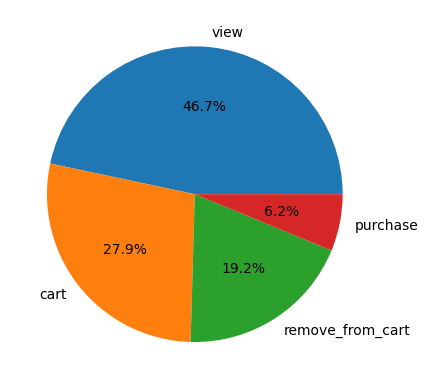

In [34]:
labels = df.index
sizes = df['amount']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')